# Realización del modelo a partir de lo obtenido en deepnote

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import os

# import plotly.graph_objects as go
# import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

## Cargar CSV

In [2]:
data = pd.read_csv('C:/Users/Maria/Documents/4ª/Aplicaciones y Tendencias/Smart-Energy/DFOBJETIVO.csv', usecols = ['LCLid', 'time', 'energy_mean', 'energy_max', 'energy_min',
       'temperatureMax', 'icon', 'dewPoint', 'cloudCover', 'windSpeed',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin'])
data.head()

,LCLid,energy_mean,energy_max,energy_min,temperatureMax,icon,dewPoint,cloudCover,windSpeed,apparentTemperatureHigh,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin
0,MAC000020,0.212172,0.620,0.057,9.02,wind,1.79,0.29,7.06,4.98,...,13.12,0.68,0.63,5.14,1.0,2011-12-07,4.27,4.91,9.02,0.94
1,MAC000155,0.254375,0.939,0.082,9.02,wind,1.79,0.29,7.06,4.98,...,13.12,0.68,0.63,5.14,1.0,2011-12-07,4.27,4.91,9.02,0.94
2,MAC000259,0.265896,0.887,0.036,9.02,wind,1.79,0.29,7.06,4.98,...,13.12,0.68,0.63,5.14,1.0,2011-12-07,4.27,4.91,9.02,0.94
3,MAC000239,0.157917,0.545,0.019,9.02,wind,1.79,0.29,7.06,4.98,...,13.12,0.68,0.63,5.14,1.0,2011-12-07,4.27,4.91,9.02,0.94
4,MAC000251,0.233438,1.139,0.055,9.02,wind,1.79,0.29,7.06,4.98,...,13.12,0.68,0.63,5.14,1.0,2011-12-07,4.27,4.91,9.02,0.94


In [3]:
data.dtypes

LCLid                       object
energy_mean                float64
energy_max                 float64
energy_min                 float64
temperatureMax             float64
icon                        object
dewPoint                   float64
cloudCover                 float64
windSpeed                  float64
apparentTemperatureHigh    float64
precipType                  object
visibility                 float64
humidity                   float64
apparentTemperatureLow     float64
apparentTemperatureMax     float64
uvIndex                    float64
time                        object
temperatureLow             float64
temperatureMin             float64
temperatureHigh            float64
apparentTemperatureMin     float64
dtype: object

In [4]:
data['time']=  pd.to_datetime(data['time'])
data['time'].dt.year

0          2011
1          2011
2          2011
3          2011
4          2011
           ... 
3083643    2011
3083644    2011
3083645    2011
3083646    2011
3083647    2011
Name: time, Length: 3083648, dtype: int64

In [5]:
data["year"] = ''
data["month"] = ''
data["day"] = ''
data["year"] = data["time"].dt.year
data["month"] = data["time"].dt.month
data["day"] = data["time"].dt.day

In [6]:
data = data.drop(["time"],axis=1)

In [7]:
data.head()

,LCLid,energy_mean,energy_max,energy_min,temperatureMax,icon,dewPoint,cloudCover,windSpeed,apparentTemperatureHigh,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,year,month,day
0,MAC000020,0.212172,0.620,0.057,9.02,wind,1.79,0.29,7.06,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
1,MAC000155,0.254375,0.939,0.082,9.02,wind,1.79,0.29,7.06,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
2,MAC000259,0.265896,0.887,0.036,9.02,wind,1.79,0.29,7.06,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
3,MAC000239,0.157917,0.545,0.019,9.02,wind,1.79,0.29,7.06,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
4,MAC000251,0.233438,1.139,0.055,9.02,wind,1.79,0.29,7.06,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7


In [8]:
data["LCLid"].nunique()

5555

In [9]:
obj_columns = data.select_dtypes(['object']).columns
obj_columns

Index(['LCLid', 'icon', 'precipType'], dtype='object')

In [10]:
data["icon"].unique()

array(['wind', 'partly-cloudy-day', 'partly-cloudy-night', 'fog',
       'clear-day', 'cloudy'], dtype=object)

In [11]:
data["precipType"].unique()

array(['rain', 'snow'], dtype=object)

In [16]:
for i in obj_columns:
    data[i] = data[i].astype('category')

In [17]:
data[obj_columns] = data[obj_columns].apply(lambda x: x.cat.codes)

In [18]:
data

,LCLid,energy_mean,energy_max,energy_min,temperatureMax,icon,dewPoint,cloudCover,windSpeed,apparentTemperatureHigh,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,year,month,day
0,18,0.212172,0.620,0.057,9.02,5,1.79,0.29,7.06,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
1,153,0.254375,0.939,0.082,9.02,5,1.79,0.29,7.06,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
2,257,0.265896,0.887,0.036,9.02,5,1.79,0.29,7.06,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
3,237,0.157917,0.545,0.019,9.02,5,1.79,0.29,7.06,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
4,249,0.233438,1.139,0.055,9.02,5,1.79,0.29,7.06,4.98,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083643,15,0.193824,0.359,0.062,6.91,3,2.15,0.34,4.79,3.77,...,1.90,3.77,1.0,5.16,2.68,6.91,-1.61,2011,12,6
3083644,243,0.409792,2.155,0.105,6.91,3,2.15,0.34,4.79,3.77,...,1.90,3.77,1.0,5.16,2.68,6.91,-1.61,2011,12,6
3083645,163,0.210083,0.813,0.058,6.91,3,2.15,0.34,4.79,3.77,...,1.90,3.77,1.0,5.16,2.68,6.91,-1.61,2011,12,6
3083646,171,0.163542,0.689,0.036,6.91,3,2.15,0.34,4.79,3.77,...,1.90,3.77,1.0,5.16,2.68,6.91,-1.61,2011,12,6


In [21]:
data[data["icon"] == 4] 

,LCLid,energy_mean,energy_max,energy_min,temperatureMax,icon,dewPoint,cloudCover,windSpeed,apparentTemperatureHigh,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,year,month,day
7278,18,0.152062,0.617,0.052,12.14,4,8.07,0.38,4.31,12.14,...,10.35,12.14,1.0,10.35,8.08,12.14,5.37,2011,12,22
7279,106,0.075979,0.290,0.006,12.14,4,8.07,0.38,4.31,12.14,...,10.35,12.14,1.0,10.35,8.08,12.14,5.37,2011,12,22
7280,4498,0.111229,0.256,0.019,12.14,4,8.07,0.38,4.31,12.14,...,10.35,12.14,1.0,10.35,8.08,12.14,5.37,2011,12,22
7281,93,0.086229,0.291,0.048,12.14,4,8.07,0.38,4.31,12.14,...,10.35,12.14,1.0,10.35,8.08,12.14,5.37,2011,12,22
7282,153,0.454604,1.290,0.158,12.14,4,8.07,0.38,4.31,12.14,...,10.35,12.14,1.0,10.35,8.08,12.14,5.37,2011,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082025,180,0.114167,1.252,0.050,12.58,4,4.39,0.56,2.34,10.27,...,10.27,12.58,1.0,10.27,1.31,10.27,1.31,2011,11,28
3082026,197,0.235667,0.686,0.052,12.58,4,4.39,0.56,2.34,10.27,...,10.27,12.58,1.0,10.27,1.31,10.27,1.31,2011,11,28
3082027,168,0.263687,0.984,0.099,12.58,4,4.39,0.56,2.34,10.27,...,10.27,12.58,1.0,10.27,1.31,10.27,1.31,2011,11,28
3082028,163,0.175833,0.905,0.061,12.58,4,4.39,0.56,2.34,10.27,...,10.27,12.58,1.0,10.27,1.31,10.27,1.31,2011,11,28


In [24]:
data["LCLid"].nunique()

5555

In [39]:
data["uvIndex"].unique()

array([1., 0., 2., 3.])

In [90]:
# DFOBJETIVO.set_index('time',drop=True, inplace=True)

In [99]:
# X = data.values

# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X_0 = LabelEncoder()
# X[:, 0] = labelencoder_X_0.fit_transform(X[:, 0])
# labelencoder_X_1 = LabelEncoder()
# X[:, 5] = labelencoder_X_1.fit_transform(X[:, 5])
# labelencoder_X_2 = LabelEncoder()
# X[:, 10] = labelencoder_X_2.fit_transform(X[:, 10])

# # X = OneHotEncoder().fit_transform(X).toarray()

In [100]:
# X = OneHotEncoder().fit_transform(X)

In [105]:
# print(X)

  (0, 18)	1.0
  (0, 43092)	1.0
  (0, 274077)	1.0
  (0, 279809)	1.0
  (0, 281989)	1.0
  (0, 282174)	1.0
  (0, 282276)	1.0
  (0, 282534)	1.0
  (0, 282867)	1.0
  (0, 283009)	1.0
  (0, 283228)	1.0
  (0, 283457)	1.0
  (0, 283486)	1.0
  (0, 283655)	1.0
  (0, 283984)	1.0
  (0, 284212)	1.0
  (0, 284385)	1.0
  (0, 284765)	1.0
  (0, 285068)	1.0
  (0, 285390)	1.0
  (0, 285578)	1.0
  (0, 285587)	1.0
  (0, 285594)	1.0
  (1, 153)	1.0
  (1, 57331)	1.0
  :	:
  (3083646, 285587)	1.0
  (3083646, 285593)	1.0
  (3083647, 254)	1.0
  (3083647, 160025)	1.0
  (3083647, 274396)	1.0
  (3083647, 280151)	1.0
  (3083647, 281931)	1.0
  (3083647, 282172)	1.0
  (3083647, 282284)	1.0
  (3083647, 282539)	1.0
  (3083647, 282804)	1.0
  (3083647, 282978)	1.0
  (3083647, 283228)	1.0
  (3083647, 283459)	1.0
  (3083647, 283501)	1.0
  (3083647, 283706)	1.0
  (3083647, 283950)	1.0
  (3083647, 284212)	1.0
  (3083647, 284413)	1.0
  (3083647, 284684)	1.0
  (3083647, 284998)	1.0
  (3083647, 285310)	1.0
  (3083647, 285578)	1.0
  (3

## mODELO

In [82]:
X = data.drop('energy_mean', axis=1)
Y = data.energy_mean
X

,LCLid,energy_max,energy_min,temperatureMax,icon,dewPoint,cloudCover,windSpeed,apparentTemperatureHigh,precipType,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,year,month,day
0,18,0.620,0.057,9.02,5,1.79,0.29,7.06,4.98,0,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
1,153,0.939,0.082,9.02,5,1.79,0.29,7.06,4.98,0,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
2,257,0.887,0.036,9.02,5,1.79,0.29,7.06,4.98,0,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
3,237,0.545,0.019,9.02,5,1.79,0.29,7.06,4.98,0,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
4,249,1.139,0.055,9.02,5,1.79,0.29,7.06,4.98,0,...,0.63,5.14,1.0,4.27,4.91,9.02,0.94,2011,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083643,15,0.359,0.062,6.91,3,2.15,0.34,4.79,3.77,0,...,1.90,3.77,1.0,5.16,2.68,6.91,-1.61,2011,12,6
3083644,243,2.155,0.105,6.91,3,2.15,0.34,4.79,3.77,0,...,1.90,3.77,1.0,5.16,2.68,6.91,-1.61,2011,12,6
3083645,163,0.813,0.058,6.91,3,2.15,0.34,4.79,3.77,0,...,1.90,3.77,1.0,5.16,2.68,6.91,-1.61,2011,12,6
3083646,171,0.689,0.036,6.91,3,2.15,0.34,4.79,3.77,0,...,1.90,3.77,1.0,5.16,2.68,6.91,-1.61,2011,12,6


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [84]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [85]:
Y_pred_train = model.predict(X_train)

In [86]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-8.42567477e-08  1.81347406e-01  1.09054646e+00 -3.80199656e-04
 -8.41306136e-05 -7.56036967e-04 -3.23984928e-04  1.51451317e-03
  3.71305095e-04 -5.49033824e-04  2.72291665e-04  4.28703872e-02
 -2.49121080e-04  2.80353683e-04 -2.05827245e-03  5.01262492e-04
 -1.13290935e-04 -1.45940299e-03  2.00538312e-05 -9.98224756e-04
  2.91965869e-04 -3.71539111e-05]
Intercept: 1.9847832617523475
Mean squared error (MSE): 0.01
Coefficient of determination (R^2): 0.83


## Aplicar el modelo entrenado al set de testeo

In [87]:
Y_pred_test = model.predict(X_test)

In [88]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))
#ES RARO QUE SALGA LO MISMO, HAY FALLO

Coefficients: [-8.42567477e-08  1.81347406e-01  1.09054646e+00 -3.80199656e-04
 -8.41306136e-05 -7.56036967e-04 -3.23984928e-04  1.51451317e-03
  3.71305095e-04 -5.49033824e-04  2.72291665e-04  4.28703872e-02
 -2.49121080e-04  2.80353683e-04 -2.05827245e-03  5.01262492e-04
 -1.13290935e-04 -1.45940299e-03  2.00538312e-05 -9.98224756e-04
  2.91965869e-04 -3.71539111e-05]
Intercept: 1.9847832617523475
Mean squared error (MSE): 0.01
Coefficient of determination (R^2): 0.83


## Prueba y ejecución del modelo de regresión

In [90]:
LCLid = input("Indíca código de hogar (1-5555): ")
energy_max = data['energy_max'].mean()
energy_min = data['energy_min'].mean()
temperatureMax = data['temperatureMax'].mean()
icon = input("Indica si 0-Despejado, 1-Nublado, 2-Niebla, 3-Parcialmente nublado por el día, 4-Parcialmente nublado por la noche, 5-Viento")
dewPoint = data['dewPoint'].mean()
cloudCover = input("Escribe el nivel de nubosidad [0-1]: ")
windSpeed = input("¿Y la velocidad del viento? [0-10] ")
appTempHigh = data['apparentTemperatureHigh'].mean()
precipType = input("Tipo de precipitación (1 si llueve y 0 si nieva): ")
visibility = input("Visibilidad del ambiente [1-15]: ")
humidity = input("Qué humedad [0-1]: ")
appTempLow = data['apparentTemperatureLow'].mean()
appTempMax = data['apparentTemperatureMax'].mean()
uvIndex = input("Índice de rayos ultravioleta (0,1,2,3): ")
tempLow = data['temperatureLow'].mean()
tempMin = data['temperatureMin'].mean()
tempHigh = data['temperatureMin'].mean()
appTempMin = data['apparentTemperatureMin'].mean()
year = input("Año: ")
month = input("Mes: ")
day = input("Día: ")


energia_media = (model.intercept_ + (model.coef_[0]*int(LCLid)) + (model.coef_[1]*energy_max) + (model.coef_[2]*energy_min) 
                + (model.coef_[3]*temperatureMax) + (model.coef_[4]*int(icon)) + (model.coef_[5]*dewPoint) + (model.coef_[6]*float(cloudCover)) + (model.coef_[7]*float(windSpeed)) + (model.coef_[8]*appTempHigh) + (model.coef_[9]*float(precipType)) + (model.coef_[10]*float(visibility)) + (model.coef_[11]*float(humidity))+ (model.coef_[12]*appTempLow) + (model.coef_[13]*appTempMax) + (model.coef_[14]*int(uvIndex)) + (model.coef_[15]*tempLow) + (model.coef_[16]*tempMin) +(model.coef_[17]*tempHigh) + (model.coef_[18]*appTempMin) + (model.coef_[19]*int(year)) + (model.coef_[20]*int(month)) + (model.coef_[21]*int(day)))
print ("La energía media consumida en el día que has señalado es: ", '%.4f' % energia_media)

Indíca código de hogar (1-5555): 218
Indica si 0-Despejado, 1-Nublado, 2-Niebla, 3-Parcialmente nublado por el día, 4-Parcialmente nublado por la noche, 5-Viento0
Escribe el nivel de nubosidad [0-1]: 0.3
¿Y la velocidad del viento? [0-10] 3
Tipo de precipitación (1 si llueve y 0 si nieva): 1
Visibilidad del ambiente [1-15]: 13
Qué humedad [0-1]: 0.5
Índice de rayos ultravioleta (0,1,2,3): 3
Año: 2011
Mes: 7
Día: 25
La energía media consumida en el día que has señalado es:  0.2372


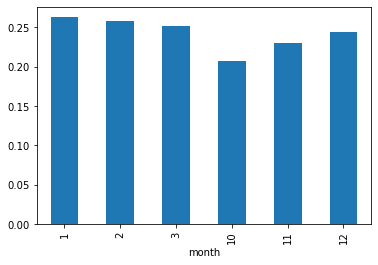

In [78]:
y2013_data = data[data['year']==2013]
y2013_data.groupby("month").mean()["energy_mean"].plot.bar()

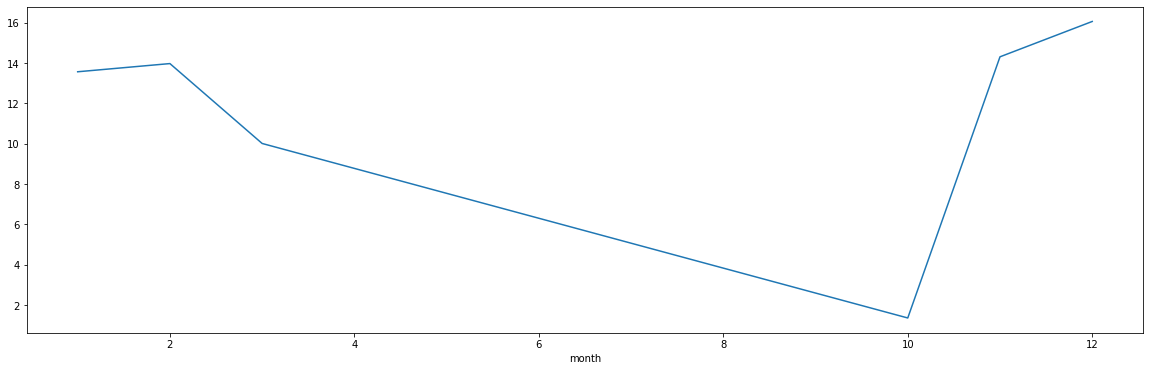

In [76]:
y2012_data = data[data['year']==2012]
num_households_df = y2012_data.reset_index().groupby("month").nunique()["LCLid"] # get the number of households on each day
energy_df = y2012_data.reset_index().groupby("month").sum()["energy_mean"] # get the total energy usage per day

# normalise the energy usage to the number of households and plot
energy_per_household_df = pd.concat([num_households_df, energy_df], axis=1)
energy_per_household_df["normalised"] = energy_per_household_df["energy_mean"] / energy_per_household_df["LCLid"]
energy_per_household_df["normalised"].plot(figsize=(20,6));

## Modelo Mejorado

In [42]:
dataMejorado = data.drop(["dewPoint", "uvIndex", "cloudCover", "visibility"], axis=1)

In [43]:
X = dataMejorado.drop('energy_mean', axis=1)
Y = dataMejorado.energy_mean
X

,LCLid,energy_max,energy_min,temperatureMax,icon,windSpeed,apparentTemperatureHigh,precipType,humidity,apparentTemperatureLow,apparentTemperatureMax,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,year,month,day
0,18,0.620,0.057,9.02,5,7.06,4.98,0,0.68,0.63,5.14,4.27,4.91,9.02,0.94,2011,12,7
1,153,0.939,0.082,9.02,5,7.06,4.98,0,0.68,0.63,5.14,4.27,4.91,9.02,0.94,2011,12,7
2,257,0.887,0.036,9.02,5,7.06,4.98,0,0.68,0.63,5.14,4.27,4.91,9.02,0.94,2011,12,7
3,237,0.545,0.019,9.02,5,7.06,4.98,0,0.68,0.63,5.14,4.27,4.91,9.02,0.94,2011,12,7
4,249,1.139,0.055,9.02,5,7.06,4.98,0,0.68,0.63,5.14,4.27,4.91,9.02,0.94,2011,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083643,15,0.359,0.062,6.91,3,4.79,3.77,0,0.83,1.90,3.77,5.16,2.68,6.91,-1.61,2011,12,6
3083644,243,2.155,0.105,6.91,3,4.79,3.77,0,0.83,1.90,3.77,5.16,2.68,6.91,-1.61,2011,12,6
3083645,163,0.813,0.058,6.91,3,4.79,3.77,0,0.83,1.90,3.77,5.16,2.68,6.91,-1.61,2011,12,6
3083646,171,0.689,0.036,6.91,3,4.79,3.77,0,0.83,1.90,3.77,5.16,2.68,6.91,-1.61,2011,12,6


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [45]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [46]:
Y_pred_train = model.predict(X_train)

In [47]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-1.15451931e-07  1.81270451e-01  1.08994178e+00 -3.89782556e-04
  1.21323099e-04  1.48223884e-03  4.88711031e-04 -8.26478113e-04
  2.78701257e-02 -1.91499210e-04  2.42062913e-04  4.83383161e-04
 -3.31746971e-04 -1.94534115e-03 -9.56783336e-05 -6.99021266e-04
  3.94891416e-04 -4.59742525e-05]
Intercept: 1.3965382574193062
Mean squared error (MSE): 0.01
Coefficient of determination (R^2): 0.83


In [ ]:
LCLid = input("Indícame el barrio (1-5555): ")
energy_max = data['energy_max'].mean()
energy_min = data['energy_min'].mean()
temperatureMax = data['temperatureMax'].mean()
icon = input("Indica si 0-Despejado, 1-Nublado, 2-Niebla, 3-Parcialmente nublado por el día, 4-Parcialmente nublado por la noche, 5-Viento")
# dewPoint = data['dewPoint'].mean()
# cloudCover = input("Escribe el nivel de nubosidad [0-1]: ")
windSpeed = input("¿Y la velocidad del viento? [0-10] ")
appTempHigh = data['apparentTemperatureHigh'].mean()
precipType = input("Tipo de precipitación (1 si llueve y 0 si nieva): ")
# visibility = input("Visibilidad del ambiente [1-15]: ")
humidity = input("Qué humedad [0-1]: ")
appTempLow = data['apparentTemperatureLow'].mean()
appTempMax = data['apparentTemperatureMax'].mean()
# uvIndex = input("Índice de rayos ultravioleta (0,1,2,3): ")
tempLow = data['temperatureLow'].mean()
tempMin = data['temperatureMin'].mean()
tempHigh = data['temperatureMin'].mean()
appTempMin = data['apparentTemperatureMin'].mean()
year = input("Año: ")
month = input("Mes: ")
day = input("Día: ")


energia_media = (model.intercept_ + (model.coef_[0]*int(LCLid)) + (model.coef_[1]*energy_max) + (model.coef_[2]*energy_min) 
                + (model.coef_[3]*temperatureMax) + (model.coef_[4]*int(icon)) + (model.coef_[5]*dewPoint) + 
                (model.coef_[6]*float(cloudCover)) + (model.coef_[7]*float(windSpeed)) + (model.coef_[8]*appTempHigh) + 
                (model.coef_[9]*float(precipType)) + (model.coef_[10]*float(visibility)) + (model.coef_[11]*float(humidity))+
                (model.coef_[12]*appTempLow) + (model.coef_[13]*appTempMax) + (model.coef_[14]*int(uvIndex)) + 
                (model.coef_[15]*tempLow) + (model.coef_[16]*tempMin) +(model.coef_[17]*tempHigh) + 
                (model.coef_[18]*appTempMin) + (model.coef_[19]*int(year)) + (model.coef_[20]*int(month)) + 
                (model.coef_[21]*int(day)))
print ("La energía media consumida en el día que has señalado es: ", '%.4f' % energia_media)

# Random Forest

In [74]:
# Labels are the values we want to predict
labels = np.array(data['energy_mean'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop('energy_mean', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [75]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [76]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2312736, 22)
Training Labels Shape: (2312736,)
Testing Features Shape: (770912, 22)
Testing Labels Shape: (770912,)


In [77]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
# Train the model on training data
rf.fit(train_features, train_labels);

In [78]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.03 degrees.


In [79]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


<ipython-input-79-f46941e48193>:2: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * (errors / test_labels)


## Más Visualización

In [3]:
dataviz = pd.read_csv('C:/Users/Maria/Documents/4ª/Aplicaciones y Tendencias/Smart-Energy/DFOBJETIVO.csv')

In [5]:
dataviz["day"].nunique

<bound method IndexOpsMixin.nunique of 0          2011-12-07
1          2011-12-07
2          2011-12-07
3          2011-12-07
4          2011-12-07
              ...    
3083643    2011-12-06
3083644    2011-12-06
3083645    2011-12-06
3083646    2011-12-06
3083647    2011-12-06
Name: day, Length: 3083648, dtype: object>

In [6]:
# daily_df = pd.read_csv(data_dir+'daily_dataset/block_71.csv')
dataviz['day'] = pd.to_datetime(dataviz['day'])
dataviz = dataviz.set_index('day')
dataviz.head()

,LCLid,energy_mean,energy_max,energy_min,temperatureMax,temperatureMaxTime,icon,dewPoint,temperatureMinTime,cloudCover,...,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,uvIndexTime,temperatureLowTime,apparentTemperatureMin
day,,,,,,,,,,,,,,,,,,,,,
2011-12-07,MAC000020,0.212172,0.620,0.057,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,0.29,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
2011-12-07,MAC000155,0.254375,0.939,0.082,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,0.29,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
2011-12-07,MAC000259,0.265896,0.887,0.036,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,0.29,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
2011-12-07,MAC000239,0.157917,0.545,0.019,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,0.29,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94
2011-12-07,MAC000251,0.233438,1.139,0.055,9.02,2011-12-07 12:00:00,wind,1.79,2011-12-07 23:00:00,0.29,...,1.0,2011-12-07,2011-12-07 15:53:51,4.27,4.91,9.02,2011-12-07 07:52:35,2011-12-07 10:00:00,2011-12-08 02:00:00,0.94


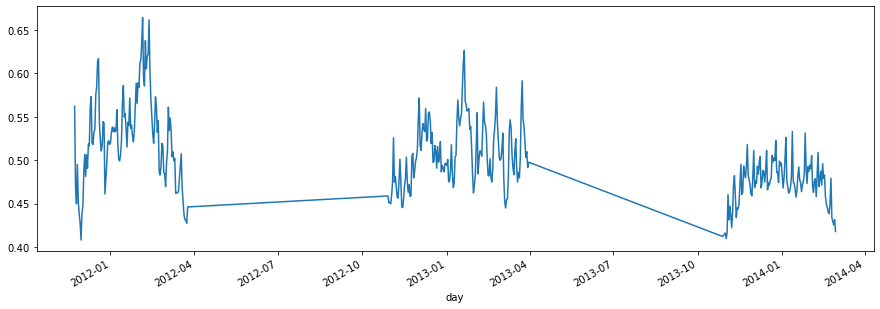

In [7]:
num_households_df = dataviz.reset_index().groupby("day").nunique()["LCLid"] # numero de hogares cada día
energy_df = dataviz.reset_index().groupby("day").sum()["energy_mean"] # suma de las medias por día

energy_per_household_df = pd.concat([num_households_df, energy_df], axis=1)
energy_per_household_df["normalised"] = energy_per_household_df["energy_mean"] / energy_per_household_df["LCLid"]
energy_per_household_df["normalised"].plot(figsize=(15,5), label = "Energía por hogar");